In [1]:
import numpy as np
import pandas as pd

In [2]:
# Logistic regression model from scratch

In [4]:
# Implement the sigmoid function using numpy

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A numpy array of any size

    Return:
    s -- sigmoid(x)
    """
    
    s = 1/(1 + np.exp(-x))
    
    return s

In [5]:
# Implement parameter initialization of w (weight vector) and b (bias) 

def initialize(dim):
    """  
    Argument:
    dim -- the number of parameters

    Returns:
    w -- initialized vector of shape (1, dim)
    b -- initialized scalar
    """
    w = np.zeros((1, dim))
    b = 0

    assert(w.shape == (1, dim))
    assert(isinstance(b, float) or isinstance(b, int))

    return w,b

In [6]:
# Compute the cost of logistic regression

def compute_cost(w,b,X,Y):
    """
    Arguments:
    w -- weights
    b -- bias
    X -- input data
    Y -- target or label vector

    Return:
    sigma -- the sigmoid of the z
    cost -- cost for logistic regression
    """
    w = w.reshape(1,-1)
    sigma = sigmoid(np.dot(w, X.T)+b)
    m = X.shape[0]
    cost = -(1 / m) * np.sum(Y*np.log(sigma) + (1-Y)*np.log(1-sigma))

    return sigma, cost

In [7]:
# Compute the gradient of w and b

def gradient(w,b,X,Y,sigma):
    """
    Arguments:
    w -- weights
    b -- bias
    X -- input data
    Y -- target or label vector

    Return:
    dw, db -- gradient of the loss with respect to w, gradient of the loss with respect to b
    """
    m = X.shape[0]
    dw = (1 / m) * np.dot((sigma-Y), X)
    db = (1/m) * np.sum(sigma-Y)

    return dw, db

In [15]:
# Implement the parameters update (For a parameter  𝜃 , the update rule is  𝜃=𝜃−𝛼 𝑑𝜃 , where  𝛼  is the learning rate)

def update_parameters(w,b,X,Y,num_iterations,learning_rate):
    """
    This function optimizes w and b by running a gradient descent algorithm

      Arguments:
      w -- weights
      b -- bias
      X -- input data
      Y -- target or label vector
      num_iterations -- number of iterations of the optimization loop
      learning_rate -- learning rate of the gradient descent update rule

      Returns:
      params -- dictionary containing the weights w and bias b
      grads -- dictionary containing the gradients of the weights and bias with respect to the cost function.
    """
    for i in range(num_iterations):
        w = w.reshape(1,-1)
        w_prev = w
        b_prev = b
        
        # Cost and gradient calculation
        sigma, cost = compute_cost(w, b, X, Y)
        dw, db = gradient(w, b, X, Y,sigma)

        # update rule 
        w = w_prev - learning_rate*dw
        b = b_prev - learning_rate*db

        # Print the cost every 100 training iterations
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost)) 

    return w,b,dw,db


In [9]:
# Prediction

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias, a scalar
    X -- input data
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0]
    Y_prediction = np.zeros((1,m))
    
    # Compute vector "sigma" predicting the probabilities of input X
    sigma = sigmoid(np.dot(w, X.T)+b)
    # Convert probabilities sigma[0,i] to actual predictions.
    Y_prediction = (sigma >= 0.5).astype(float)

    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [13]:
# Create a model using the above functions

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of update_parameters()

    Returns:
    d -- dictionary containing information about the model.
    """
    # initialize parameters
    w, b = initialize(X_train.shape[1])

    # Gradient descent
    w,b,dw,db = update_parameters(w,b,X_train,Y_train,num_iterations,learning_rate)
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))


    d = {"Y_prediction_test": Y_prediction_test, 
        "Y_prediction_train" : Y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}

    return d


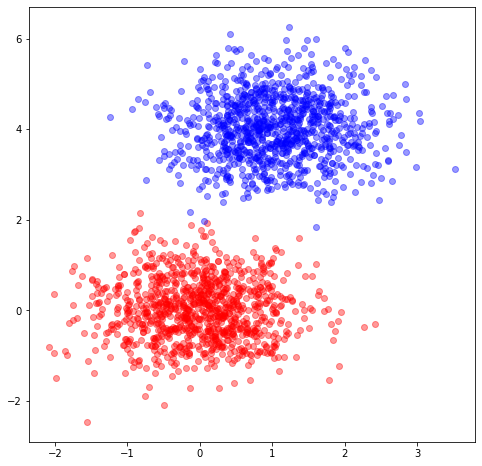

In [11]:
# Create a dataset from a multivariate normal distribution to test the model with a total of 2000 samples

import matplotlib.pyplot as plt
num_observations = 1000 #number of observations of each 
mean_class1 = [0,0]
mean_class2 = [1, 4]
cov_matrix =  [[0.5, 0],[0, 0.5]]

x1 = np.random.multivariate_normal(mean_class1, cov_matrix, num_observations)
x2 = np.random.multivariate_normal(mean_class2, cov_matrix, num_observations)

y1 = np.zeros((num_observations, 1))
y2 = np.ones((num_observations, 1))

X = np.vstack((x1,x2)) #Combine features together
y = np.vstack((y1,y2))#Create the labels


plt.figure(figsize=(8,8))
plt.scatter(X[0:num_observations, 0], 
            X[0:num_observations, 1],
            c = 'r', alpha = .4)
plt.scatter(X[num_observations:, 0], 
            X[num_observations:, 1],
            c = 'b', alpha = .4)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.486018
Cost after iteration 200: 0.421917
Cost after iteration 300: 0.386417
Cost after iteration 400: 0.360787
Cost after iteration 500: 0.339975
Cost after iteration 600: 0.322104
Cost after iteration 700: 0.306306
Cost after iteration 800: 0.292107
Cost after iteration 900: 0.279215
Cost after iteration 1000: 0.267427
Cost after iteration 1100: 0.256595
Cost after iteration 1200: 0.246601
Cost after iteration 1300: 0.237353
Cost after iteration 1400: 0.228769
Cost after iteration 1500: 0.220784
Cost after iteration 1600: 0.213339
Cost after iteration 1700: 0.206382
Cost after iteration 1800: 0.199870
Cost after iteration 1900: 0.193762
train accuracy: 97.21428571428571 %
test accuracy: 97.33333333333333 %


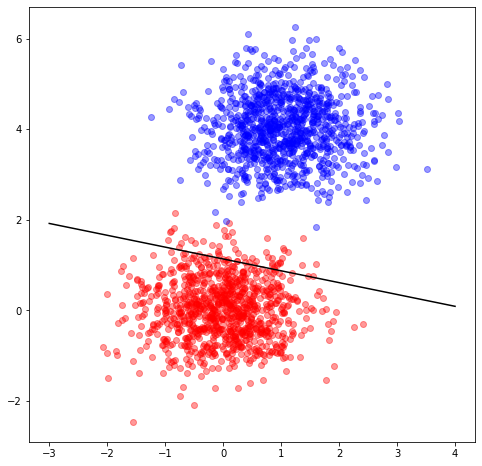

In [16]:
# Split the dataset into train and test set and use the model function to evaluate the model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=6)
y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)

d = model(X_train,y_train,X_test,y_test,num_iterations = 2000, learning_rate = 0.004)

# Plot again
plt.figure(figsize=(8,8))
plt.scatter(X[0:num_observations, 0], 
            X[0:num_observations, 1],
            c = 'r', alpha = .4)
plt.scatter(X[num_observations:, 0], 
            X[num_observations:, 1],
            c = 'b', alpha = .4)

x_boundary = np.linspace(-3, 4, 1000) # Return evenly spaced numbers over a specified interval.
weights =  d['w'][0]

b =  d['b']
y_boundary = -(weights[0]*x_boundary/weights[1] + b/weights[1])

plt.plot(x_boundary, y_boundary, color='black')